# Load stuff up

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from tqdm import tqdm

In [2]:
data_dir = "../data/"

In [3]:
# HAP query mutants, expression lfc to HAP1 WT
hap1_expression_lfc = pd.read_csv(data_dir + "hap1_expression_lfc.csv", index_col=0)

# Raw qGI scores
hap1_crispr = pd.read_csv(data_dir + "hap1_crispr.csv", index_col=0)

# Expression lfc to DepMap median, then z-score transformed
depmap_expression_lfc_zscore = pd.read_csv(data_dir + "depmap_expression_lfc_zscore.csv", index_col=0)

# DepMap CRISPR gene effects, z-score transformed
depmap_crispr_zscore = pd.read_csv(data_dir + "depmap_crispr_zscore.csv", index_col=0)

hap1_expression_lfc.shape, hap1_crispr.shape, depmap_expression_lfc_zscore.shape, depmap_crispr_zscore.shape

((60, 16372), (60, 16432), (1021, 16372), (1021, 16432))

In [4]:
display(hap1_expression_lfc.head(), hap1_crispr.head(), depmap_expression_lfc_zscore.head(), depmap_crispr_zscore.head())

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADACL4,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ARID1A_019_min,-0.084393,0.0,-0.147231,0.157590,0.055844,-0.573164,-0.056520,-0.111263,0.0,0.0,...,0.113578,0.151927,0.148057,-0.081527,-0.237012,1.067202,0.089019,0.209173,0.222016,0.184415
TUBB_312_rich,-0.052505,0.0,0.702654,0.000000,0.000000,-0.036314,-0.081951,-0.166712,0.0,0.0,...,0.140634,0.515692,-0.544428,-0.580111,0.161650,0.126039,-0.151425,0.299858,0.247068,0.602173
RHOA_178_min,0.064315,0.0,-0.147231,0.172966,0.000000,1.067335,-0.011180,-0.202589,0.0,0.0,...,0.245787,0.249655,0.079060,-0.379479,0.036219,-0.572442,-0.069545,-0.251144,0.448150,0.035675
POLR2A_281_rich,0.120074,0.0,-0.073602,0.371187,0.000000,0.367672,-0.065692,-0.936705,0.0,0.0,...,0.252126,-0.201740,0.121699,-0.356995,0.089095,1.727093,-0.550399,-0.521173,-0.125355,0.168875
PSMC5_315_rich,0.139203,0.0,0.077268,0.000000,0.000000,-0.382643,-0.121161,-0.059450,0.0,0.0,...,-0.089155,0.388849,0.089179,0.337710,0.067586,0.318417,-0.167314,-0.185748,-0.135044,-0.150268


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ARID1A_019_min,0.071418,0.316690,0.010574,-0.085196,-0.023159,-0.113766,0.092965,0.049046,0.237073,-0.162579,...,0.043132,0.021004,-0.040488,0.166691,-0.142278,-0.019439,-0.082685,0.326004,-0.313797,0.205942
TUBB_312_rich,-0.154085,0.310388,0.024848,0.054087,0.014244,-0.032237,-0.094366,0.130520,-0.020056,-0.135761,...,-0.076941,-0.022916,0.358132,0.017626,-0.262726,-0.137035,0.037090,0.487719,0.213012,-0.250219
RHOA_178_min,0.202025,-0.037464,0.155645,0.111250,0.100754,-0.006131,-0.091993,-0.013058,0.029283,0.004613,...,0.174488,0.058054,-0.127421,-0.172388,0.060433,-0.035178,0.036162,0.133385,-0.110867,0.000702
POLR2A_281_rich,-0.082532,-0.269977,-0.014917,-0.162425,-0.061699,0.004124,-0.106612,-0.268794,-0.054147,0.019849,...,-0.114852,0.087124,0.168949,-0.507124,-0.233413,-0.224767,0.181330,-0.008551,0.090171,-0.092736
PSMC5_315_rich,0.105695,0.044078,-0.015011,0.002232,-0.058973,-0.005606,-0.187995,0.208284,-0.016312,0.009155,...,0.006981,0.085635,-0.039827,-0.161266,0.152414,-0.044009,0.313931,-0.259948,-0.122938,0.368591


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADACL4,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-000001,0.278897,-0.220332,-0.353268,-0.268837,-0.309877,-0.743399,0.519830,0.175776,-0.085295,-0.132347,...,0.930845,0.399901,-0.110074,-0.325771,1.922237,2.162248,0.364674,0.650601,-0.309991,0.459539
ACH-000004,0.813461,-0.294208,-0.359683,-0.023020,0.977080,-1.310591,1.620091,-1.042164,-0.085295,-0.132347,...,-0.134296,-0.177471,-0.474133,-0.794000,0.276593,-0.922391,-0.864624,0.786428,0.266955,1.326403
ACH-000005,0.725374,-0.275466,-0.399373,-0.370484,-0.309877,-1.352339,1.620091,-0.308089,-0.085295,-0.132347,...,1.656180,0.509160,-0.402540,-0.551458,0.495690,-0.922391,0.307256,0.654327,0.373113,2.444047
ACH-000007,-1.219399,1.548572,-0.366154,-0.385577,-0.309877,-1.360934,0.054641,0.385954,-0.085295,-0.132347,...,-0.708388,-0.150351,-0.884080,-0.571866,0.663667,-0.922391,-0.933668,0.284022,0.570775,-1.035774
ACH-000009,-0.551792,4.387945,-0.340602,-0.385577,0.469807,1.366802,0.473854,0.665283,-0.029190,-0.132347,...,0.507797,1.638779,-0.388467,0.094491,0.511794,0.344079,0.620275,1.424754,0.265194,-1.229187


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-000001,-0.825790,1.153641,-0.120724,-2.138049,0.749360,2.491614,-0.808823,0.278632,1.873050,-0.978996,...,-1.359505,0.529369,1.837358,1.468376,2.201187,-2.375966,1.274226,0.793520,2.415169,-0.791616
ACH-000004,0.564651,0.039711,-1.116518,-1.067062,0.710438,-0.589461,2.453345,0.314213,2.007243,0.418096,...,1.702279,0.304934,0.409581,1.605519,1.531281,0.988895,-1.431617,1.104457,3.459211,1.493639
ACH-000005,-0.675136,0.654328,1.631419,0.459201,-0.386119,-1.227648,1.333600,0.098420,-0.592599,-0.686365,...,0.512223,-0.458845,0.407150,-0.712505,0.578254,-1.453687,0.371510,-0.239804,1.453696,0.900438
ACH-000007,0.068759,-0.511652,0.232759,0.373540,1.065789,0.555382,-0.236842,-0.392243,-1.249900,0.813795,...,-0.124342,-0.468698,0.226961,-0.382168,1.056793,-0.401302,-1.834813,0.189337,-1.291572,-0.904509
ACH-000009,0.458528,-0.600294,0.409748,0.175980,1.525947,-0.326908,0.155399,-0.078622,0.569985,-0.080630,...,0.606654,-0.190064,0.979833,-0.488176,-0.103982,-0.530175,-2.898226,0.966610,1.245292,0.094239


In [5]:
from utils import *

In [6]:
all_genes = hap1_crispr.columns
len(all_genes)

16432

In [7]:
raw_qGI = pd.read_csv("../data/qGI_20211111_fullFF.txt", index_col=0, sep="\t").loc[hap1_crispr.columns]
raw_qGI

,ABCC1_058_min,ACACA_031_min,ACO2_050_min,ACTB_165_min,ACTG1_124_min,ADAR_332_rich,AKT1_380_rich,ALG12_122_min,ALG3_249_rich,ALG8_055_min,...,TAZ_264_rich,TMEM126A_402_rich,TMEM209_310_rich,TSC22D2_307_rich,VPS52_268_rich,VPS52_290_rich,VPS52_293_rich,VPS52_297_rich,WASL_162_min,WNK1_149_min
A1BG,0.123320,0.008654,-0.033253,-0.012187,-0.004685,-0.055659,-0.102884,0.134696,-0.065490,0.005661,...,-0.125094,-0.078764,-0.013304,-0.095162,0.198570,0.129320,-0.029553,0.136090,-0.158530,-0.013197
A1CF,0.029840,0.084596,-0.053316,0.048445,-0.146080,0.103935,-0.036378,-0.259772,-0.026182,0.007794,...,0.067010,0.124572,-0.099993,-0.144634,0.081403,-0.164206,-0.167883,-0.104749,-0.055304,-0.140834
A2M,0.026147,-0.192873,0.147384,-0.184542,-0.235183,0.247767,0.269033,-0.032742,-0.023987,0.304963,...,-0.071425,0.050397,-0.205269,0.043765,0.117706,-0.213148,0.045743,-0.001059,-0.123819,-0.093575
A2ML1,-0.001155,-0.215573,0.176971,0.309401,0.050798,0.088548,0.053831,0.049415,-0.072217,0.205568,...,-0.095846,0.103305,-0.066762,-0.179549,0.107642,0.295180,0.104509,0.083264,0.068939,-0.193940
A3GALT2,0.259174,0.168347,-0.047435,0.057227,0.141729,-0.040950,0.144164,-0.135348,-0.019303,-0.200843,...,-0.169062,-0.101198,-0.042045,0.076962,0.054484,0.029081,0.039719,-0.118334,-0.120011,0.005714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.029249,-0.136526,0.107733,-0.074815,0.006466,0.382843,-0.179905,0.138906,-0.025310,0.068493,...,0.053213,-0.214767,0.505133,-0.329973,0.085179,0.053442,0.463317,-0.061152,0.081049,-0.065721
ZYG11B,0.060268,0.006488,-0.157707,0.178015,0.042630,-0.034526,-0.014604,0.020941,0.081938,-0.245987,...,0.115007,-0.082193,-0.345883,-0.085976,0.296754,0.208029,-0.078805,-0.017926,0.197083,0.194924
ZYX,-0.373446,0.172082,-0.264263,0.235099,-0.055918,-0.226896,0.037612,0.024978,-0.012782,0.128202,...,0.019069,0.178016,-0.072998,-0.146468,0.161376,0.059632,-0.046969,0.043035,0.244973,-0.288382
ZZEF1,-0.161582,0.105705,-0.003307,0.259015,0.217900,-0.038814,-0.072704,0.056163,0.062240,0.137117,...,-0.137809,-0.033525,-0.079459,-0.288922,0.226038,-0.195615,-0.151670,-0.015570,-0.085346,-0.056219


In [8]:
replicates = raw_qGI.columns.map(lambda x : x.split("_")[0]).value_counts()
replicate_groups = [[c for c in raw_qGI.columns if gene in c] for gene in replicates[replicates > 1].index]

In [9]:
replicate_corrs = {}
replicate_corr_means = {}

for group in replicate_groups:
    corrs = []
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            first = group[i]
            second = group[j]
            if first.split("_")[-1] != second.split("_")[-1]: continue
            first_profile = raw_qGI[[first]]
            second_profile = raw_qGI[[second]]
            c = first_profile.iloc[:, 0].corr(second_profile.iloc[:, 0])
            corrs.append(c)
    if len(corrs) == 0: continue
    gene = first.split("_")[0]
    replicate_corrs[gene] = corrs
    replicate_corr_means[gene] = np.mean(corrs)

In [10]:
replicate_corr_means_df = pd.DataFrame(replicate_corr_means, index=["Mean corr"]).T.sort_values(by="Mean corr", ascending=False)
replicate_corr_means_df

,Mean corr
VPS52,0.629613
GSK3A,0.451996
POLR2A,0.435029
LAMTOR4,0.413004
PELO,0.362432
PDCD5,0.351352
NAA38,0.344038
EMC6,0.307851
FASN,0.306896
TMEM126A,0.280149


(-1.0, 1.0)

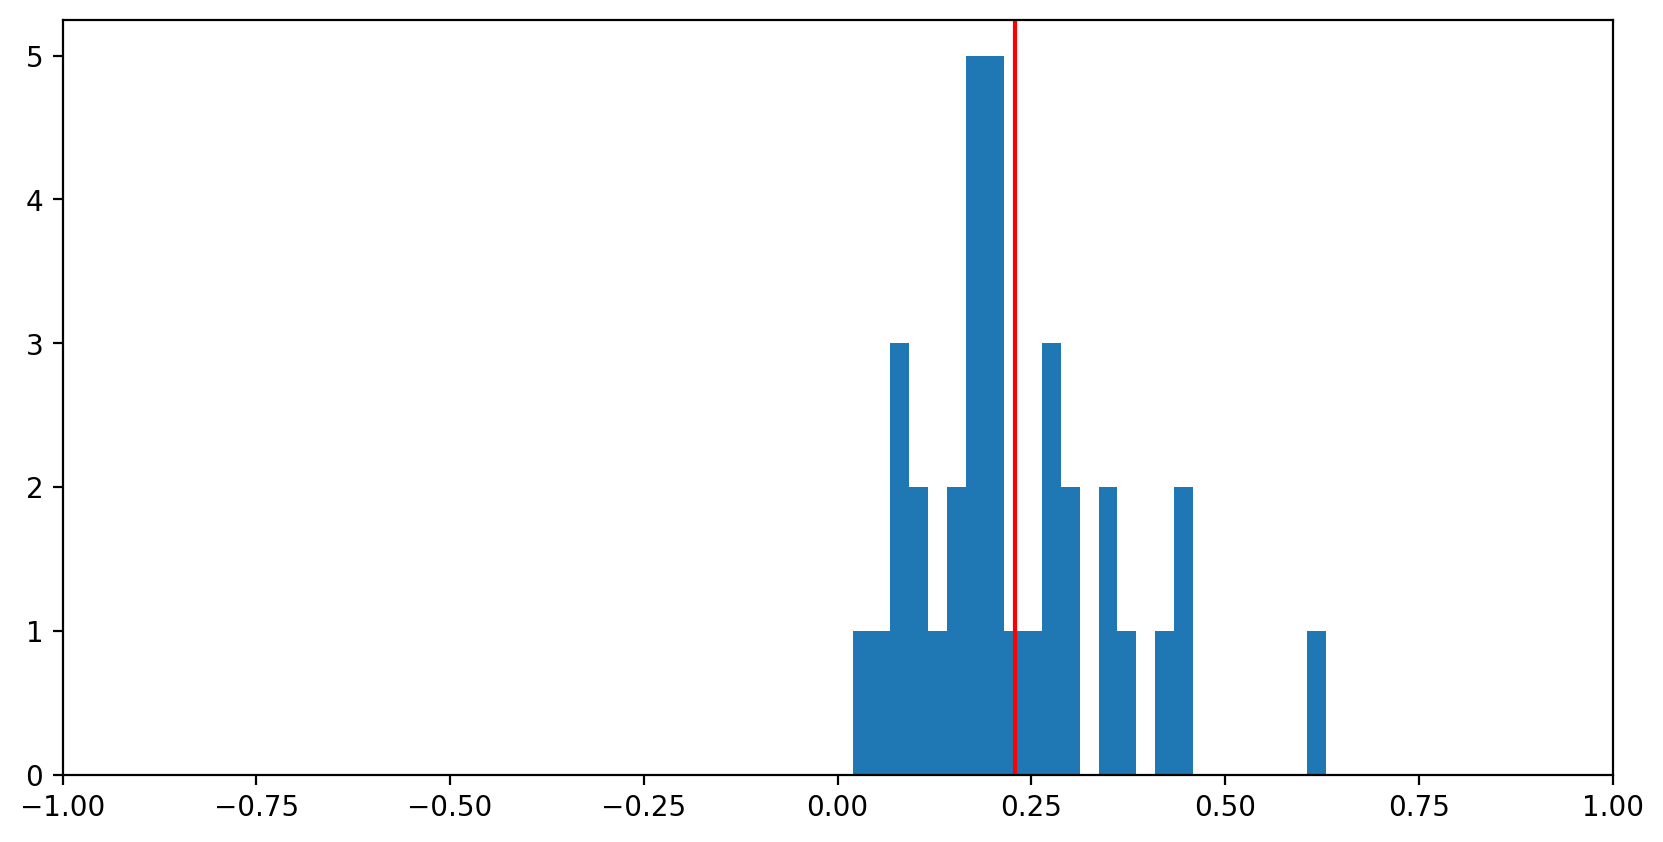

In [11]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(replicate_corr_means_df, bins=25)
plt.axvline(replicate_corr_means_df.mean().mean(), c="red")
plt.xlim(-1, 1)

In [12]:
print("Mean corr:", replicate_corr_means_df.mean().mean())
print("Prop > 0.1:", (replicate_corr_means_df > 0.1).mean().mean())
print("Prop > 0.2:", (replicate_corr_means_df > 0.2).mean().mean())
print("Prop > 0.3:", (replicate_corr_means_df > 0.3).mean().mean())

Mean corr: 0.22889659970199386
Prop > 0.1: 0.8529411764705882
Prop > 0.2: 0.5588235294117647
Prop > 0.3: 0.2647058823529412


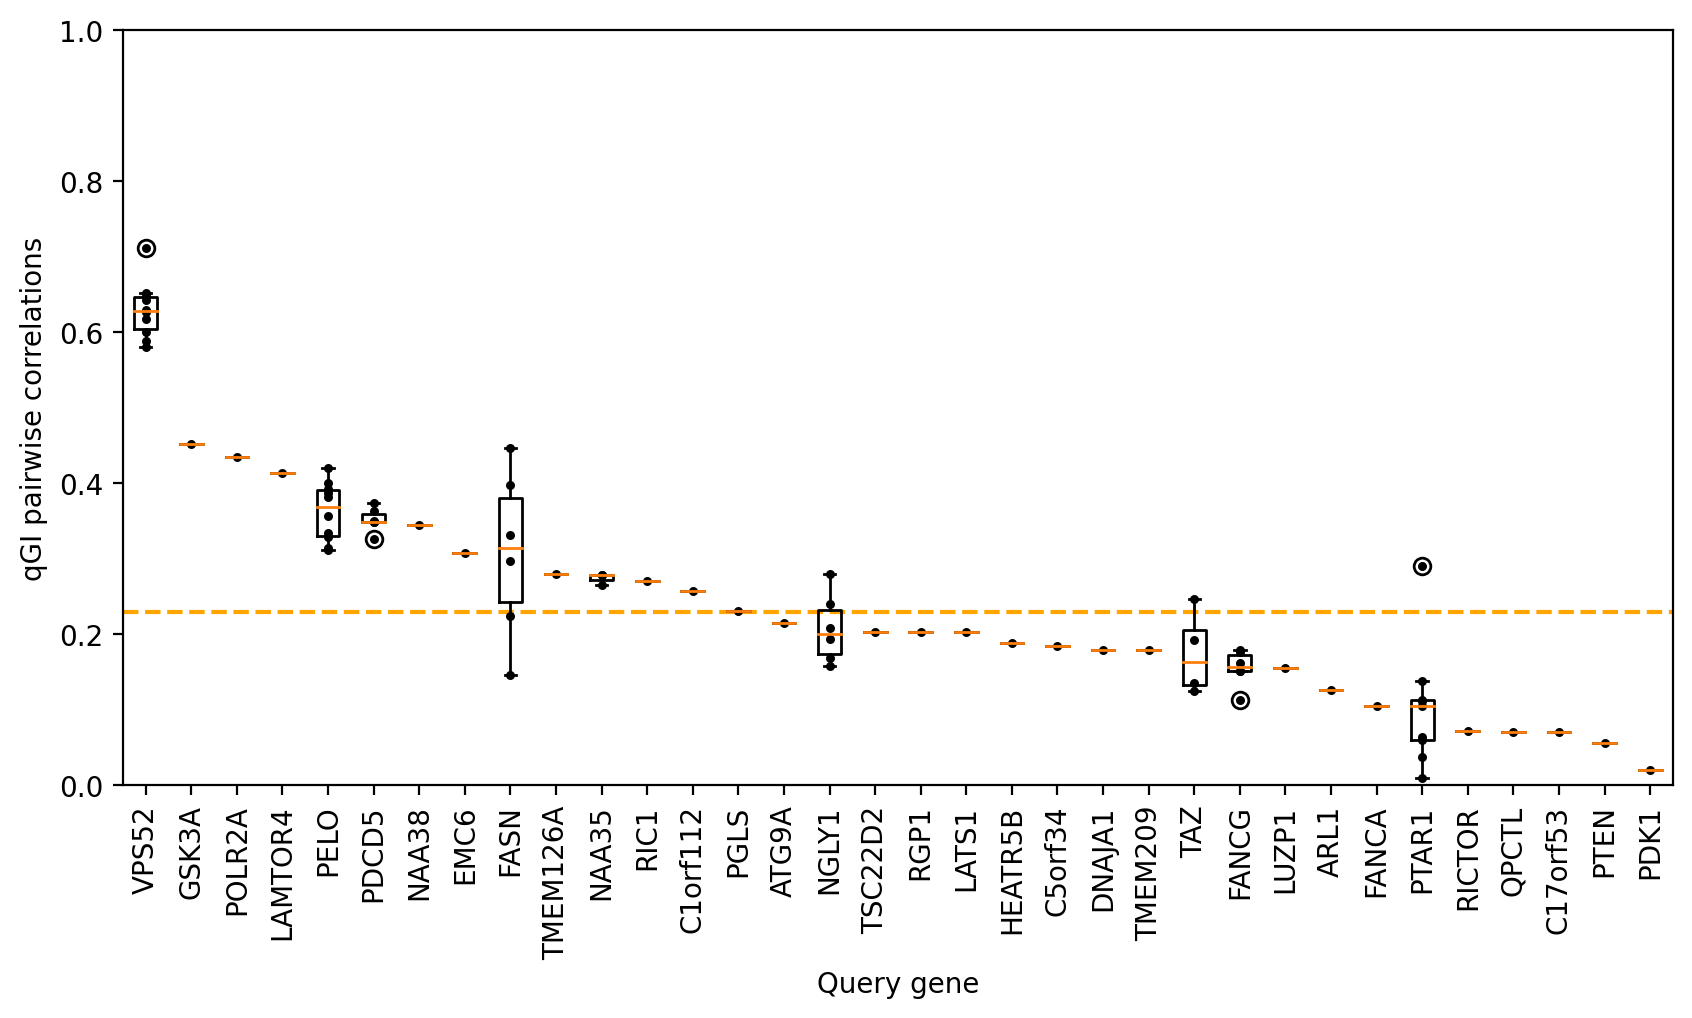

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=200)

plt.axhline(replicate_corr_means_df.mean().mean(), linestyle="--", c="orange", zorder=-1)

plt.boxplot([replicate_corrs[gene] for gene in replicate_corr_means_df.index])
for i, gene in enumerate(replicate_corr_means_df.index):
    ys = replicate_corrs[gene]
    plt.scatter([i + 1] * len(ys), ys, c="k", s=5)
    
plt.xlabel("Query gene")
plt.ylabel("qGI pairwise correlations")

plt.xticks(np.arange(1, replicate_corr_means_df.shape[0] + 1), replicate_corr_means_df.index, rotation=90)
plt.ylim(0, 1)

plt.show()

In [14]:
replicate_corr_means_df.shape[0]

34

In [15]:
replicate_corr_means_df.to_csv("../output/replicate_corr_means.csv")

In [16]:
replicate_pairs = []

for group in replicate_groups:
    found = False
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            first = group[i]
            second = group[j]
            if first.split("_")[-1] != second.split("_")[-1]: continue
            replicate_pairs.append((first, second))
            found = True
            break
        if found: break

In [17]:
replicate_pairs

[('PTAR1_003_rich', 'PTAR1_044_rich'),
 ('PELO_295_rich', 'PELO_289_rich'),
 ('TAZ_203_rich', 'TAZ_208_rich'),
 ('FANCG_192_min', 'FANCG_084_min'),
 ('PDCD5_189_min', 'PDCD5_113_min'),
 ('VPS52_241_rich', 'VPS52_268_rich'),
 ('NGLY1_097_min', 'NGLY1_029_min'),
 ('FASN_004_min', 'FASN_196_min'),
 ('NAA35_206_rich', 'NAA35_140_rich'),
 ('C1orf112_393_rich', 'C1orf112_256_rich'),
 ('LATS1_399_rich', 'LATS1_248_rich'),
 ('C5orf34_357_rich', 'C5orf34_261_rich'),
 ('C17orf53_361_rich', 'C17orf53_240_rich'),
 ('POLR2A_395_rich', 'POLR2A_281_rich'),
 ('DNAJA1_363_rich', 'DNAJA1_252_rich'),
 ('HEATR5B_406_rich', 'HEATR5B_282_rich'),
 ('PTEN_409_rich', 'PTEN_169_rich'),
 ('TMEM209_376_rich', 'TMEM209_310_rich'),
 ('QPCTL_233_rich', 'QPCTL_265_rich'),
 ('GSK3A_247_rich', 'GSK3A_405_rich'),
 ('EMC6_231_rich', 'EMC6_355_rich'),
 ('RGP1_223_rich', 'RGP1_398_rich'),
 ('FANCA_353_rich', 'FANCA_010_rich'),
 ('RIC1_382_rich', 'RIC1_222_rich'),
 ('RICTOR_401_rich', 'RICTOR_251_rich'),
 ('TMEM126A_309_ric

In [18]:
replicate_1s = raw_qGI[[s[0] for s in replicate_pairs]]
replicate_2s = raw_qGI[[s[1] for s in replicate_pairs]]

In [19]:
library_gene_corrs = []
for g in tqdm(replicate_1s.index):
    library_gene_corrs.append({
        "gene" : g,
        "corr" : np.corrcoef(replicate_1s.loc[g], replicate_2s.loc[g])[0, 1]
    })

100%|███████████████████████████████████████████████████████| 16432/16432 [00:04<00:00, 3943.43it/s]


In [20]:
library_gene_corrs_df = pd.DataFrame(library_gene_corrs)
library_gene_corrs_df

,gene,corr
0,A1BG,0.148626
1,A1CF,-0.259902
2,A2M,-0.082028
3,A2ML1,0.016557
4,A3GALT2,0.049273
...,...,...
16427,ZYG11A,0.023778
16428,ZYG11B,0.109502
16429,ZYX,-0.104505
16430,ZZEF1,0.054549


0.16535992415107373

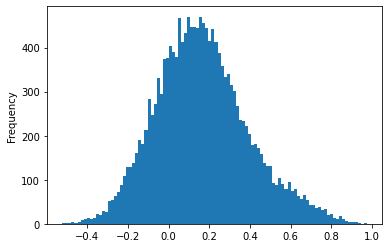

In [21]:
library_gene_corrs_df["corr"].plot.hist(bins=100)
library_gene_corrs_df["corr"].mean()

In [22]:
library_gene_corrs_df.to_csv("../output/replicate_library_gene_corrs.csv", index=None)

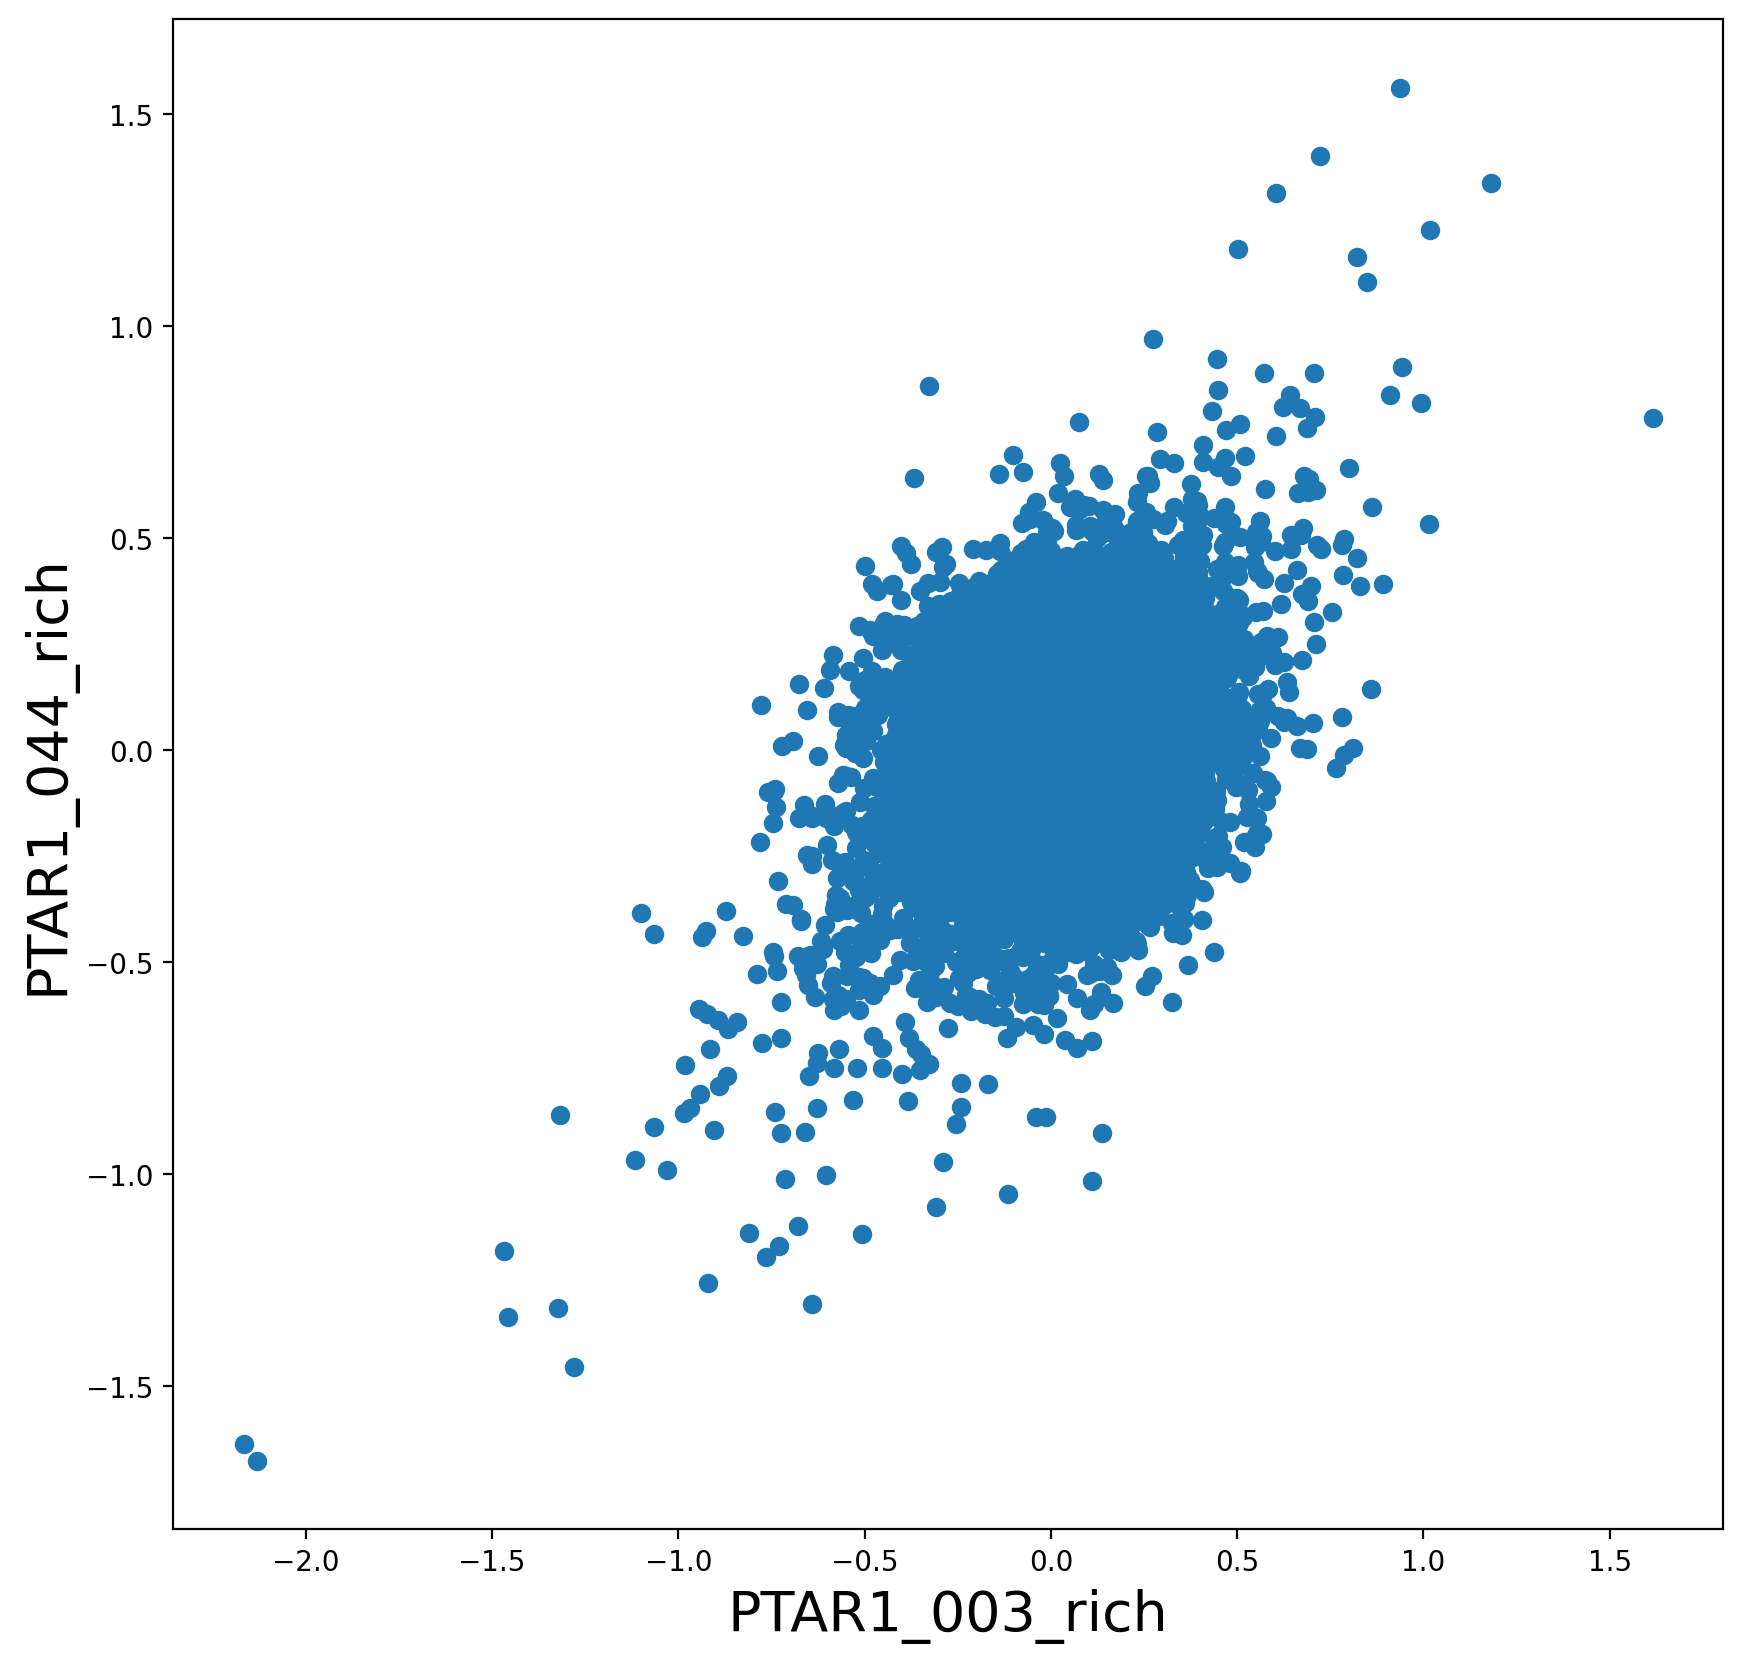

In [23]:
plt.figure(figsize=(10, 10), dpi=200)
plt.scatter(raw_qGI["PTAR1_003_rich"], raw_qGI["PTAR1_044_rich"])

plt.xlabel("PTAR1_003_rich", size=20)
plt.ylabel("PTAR1_044_rich", size=20)

plt.show()